<a href="https://colab.research.google.com/github/shelcia/landmine-detection/blob/main/LandMine_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai -q --upgrade

In [ ]:
!pip install image_slicer

# Libraries

We'll use fastai library for training the model which is built on the top of pytorch and its intuitive API prevents us from reinventing the wheel and make us to focus on the modeling part alone.

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset/43.jpg          
  inflating: dataset/10.jpg          
  inflating: dataset/80.jpg          
  inflating: dataset/2.jpg           
  inflating: dataset/73.jpg          
  inflating: dataset/50.jpg          
  inflating: dataset/76.jpg          
  inflating: dataset/87.jpg          
  inflating: dataset/29.jpg          
  inflating: dataset/71.jpg          
  inflating: dataset/69.jpg          
  inflating: dataset/84.jpg          
  inflating: dataset/18.jpg          
  inflating: dataset/72.jpg          
  inflating: dataset/57.jpg          
  inflating: dataset/38.jpg          
  inflating: dataset/37.jpg          
  inflating: dataset/58.jpg          
  inflating: dataset/39.jpg          
  inflating: dataset/92.jpg          
  inflating: dataset/26.jpg          
  inflating: dataset/56.jpg          
  inflating: dataset/11.jpg          
  inflating: dataset/23.jpg          
  inflating: dataset/8.jpg           
  inflating: dataset/21.jpg 

#Data Preparation

We are using the following dataset:

Ugur Murat Leloglu, Serkan Kaya, June 30, 2019, "Landmine Thermal Image Series", IEEE Dataport, doi: https://dx.doi.org/10.21227/tg8m-6f29. 

It consists of 96 468*622 images of thermal images of landmines.

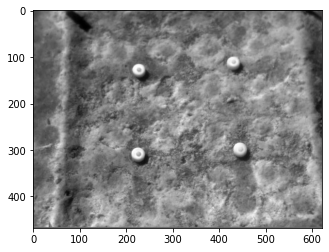

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/dataset/1.jpg')
imgplot = plt.imshow(img,cmap='gray')
plt.show()

As we can see all the images in the dataset consists of four landmines taken at different time periods. It is impossible and impractical to train with these images as all of them will have training label '1' in them,therefore overfitting.

###Cropping
Therefore inorder to make the dataset trainable, we'll slice the entire image into 6 equal patches and annotating whether the patches have landmine or not.

We are using `image_slicer` library for this.

In [ ]:
import image_slicer
for i in range(1,97):
  tiles = image_slicer.slice('/content/dataset/'+str(i)+'.jpg', 6, save=False)
  image_slicer.save_tiles(tiles, directory='/content/cropped',prefix=str(i))

The labels for the cropped images are manually  annotated in `df.csv` file and uploaded to colab.

These images are then loaded into `ImageDataLoaders` class of fastai which is used to feed the images as batches to the `cnn_learner` class.

In [ ]:
dls = ImageDataLoaders.from_csv("/content/", 'df.csv', folder='cropped')

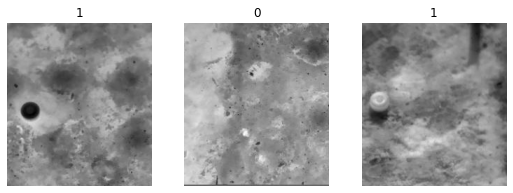

In [ ]:
dls.show_batch(nrows=1, ncols=3)

#Training

We then create an object from `cnn_learner` class. Since the training images are very small in size, we'll use a small CNN (ie., model with less layers). Therefore we use "resnet-18" architecture which is 18 layers of regular resnet. 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.745967,0.164629,0.930435,01:26


epoch,train_loss,valid_loss,accuracy,time
0,0.108690,0.055731,0.982609,01:59


#Data Augmentation

We then flip randomly 50 percent of the images for better generalization and train the model again. Now we are getting even better results.

In [ ]:
dls2 = ImageDataLoaders.from_csv("/content/", 'df.csv', folder='cropped',item_tfms=FlipItem(p=0.5))

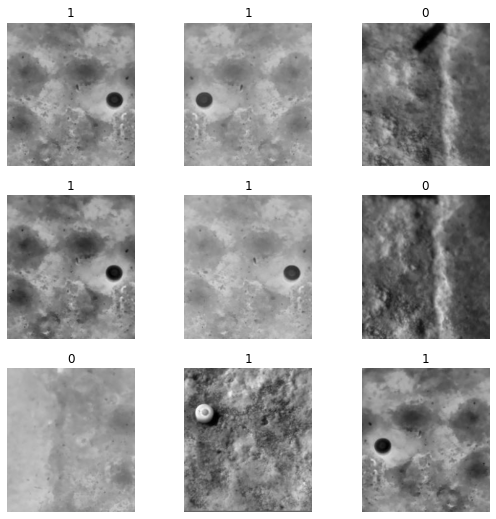

In [ ]:
dls2.show_batch(nrows=3, ncols=3)

In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy)
learn2.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.731953,0.456667,0.808696,01:26


epoch,train_loss,valid_loss,accuracy,time
0,0.137701,0.022219,1.000000,01:59
